In [17]:
# Import required libraries and dependencies
#import streamlit as st
import requests
import pandas as pd
import numpy as np
import os
import hvplot.pandas
from dotenv import load_dotenv

In [18]:
# Load environmen variable
load_dotenv()

True

In [19]:
# Define the function that pulls historical data from Polygon.io API
def get_crypto_prices(symbol, start, end):
    api_key = os.getenv("POLYGON_API_KEY")
    api_url = f'https://api.polygon.io/v2/aggs/ticker/X:{symbol}USD/range/1/day/{start}/{end}?unadjusted=true&sort=asc&apiKey={api_key}'
    raw = requests.get(api_url).json()
    df = pd.DataFrame(raw['results']).set_index('t')[['o', 'h', 'l', 'c', 'v']]
    df = df.rename(columns = {'o':'open', 'h':'high', 'l':'low', 'c':'close', 'v':'volume'})
    df.index = pd.to_datetime(df.index, unit = 'ms')
    return df

In [20]:
btc = get_crypto_prices('BTC', '2019-11-14', '2021-11-14')
print(btc)

                open          high       low     close        volume
t                                                                   
2019-11-16   8495.80   8577.000000   8423.00   8481.00  35302.986926
2019-11-17   8481.00   8699.500000   8363.50   8500.01  29416.629650
2019-11-18   8501.00   8537.000000   8010.70   8168.84  61719.424259
2019-11-19   8168.84   8245.530525   7980.07   8123.36  51260.635785
2019-11-20   8130.02   8257.800000   8027.28   8082.96  42925.712797
...              ...           ...       ...       ...           ...
2021-11-10  66928.42  69000.000000  62700.10  64912.20  41038.774515
2021-11-11  64919.18  65625.440000  64079.00  64807.74  16314.322442
2021-11-12  64807.73  65497.530000  62255.00  64147.90  24450.462201
2021-11-13  64144.42  64990.000000  63394.17  64400.01  10058.012619
2021-11-14  64394.50  65525.000000  63564.00  65468.40  13285.308933

[730 rows x 5 columns]


In [21]:
# Calculate daily returns
daily_returns = btc['close'].pct_change().dropna()
# Convert to percentage
daily_returns_pct = daily_returns * 100
daily_returns_pct.head()

t
2019-11-17    0.224148
2019-11-18   -3.896113
2019-11-19   -0.556750
2019-11-20   -0.497331
2019-11-21   -5.702366
Name: close, dtype: float64

In [22]:
# Plot the daily returns
daily_returns.hvplot(
    title='Historical Daily Returns',
    xlabel='Date',
    ylabel='Daily Returns (%)'
)
    

:Curve   [t]   (close)

In [23]:
# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod()
# Convert to a percentage
cumulative_returns_pct = cumulative_returns * 100

In [24]:
# Plot the cumulative returns
cumulative_returns_pct.hvplot(
    title='Cumulative Returns',
    xlabel='Date',
    ylabel='Cumulative Returns (%)'
)

:Curve   [t]   (close)

In [25]:
# Calculate the standard deviation
standard_deviation = daily_returns.std()
standard_deviation


0.040681551522490714

In [26]:
# Calculate the annualized standard deviation
annualized_standard_deviation = standard_deviation * np.sqrt(365)
annualized_standard_deviation

0.7772199505359658

In [27]:
# Could plot std and annualized std if we want. For now just using to calculate other metrics.

In [28]:
# Sharpe Ratio

# Calculate average annual return (crypto trades everyday of the year)
average_annual_return = daily_returns.mean() * 365
average_annual_return

1.3377621036712464

In [29]:
daily_returns.describe()

count    729.000000
mean       0.003665
std        0.040682
min       -0.388124
25%       -0.015914
50%        0.002288
75%        0.021536
max        0.194811
Name: close, dtype: float64

In [30]:
sharpe_ratio = average_annual_return / annualized_standard_deviation
sharpe_ratio

1.7212143135913256

In [31]:
# Could plot Sharpe Ratio if we want to visualize comparisons of different coins

<AxesSubplot:title={'center':'BTC Probability Distribution'}, ylabel='Frequency'>

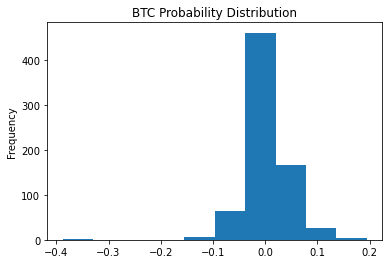

In [32]:
# Could visualize probability distributions, it would look like this
symbol = 'BTC' # Adjust to input the user selected coin


daily_returns.plot.hist(title=f'{symbol} Probability Distribution')

<AxesSubplot:title={'center':'BTC Density Plot'}, ylabel='Density'>

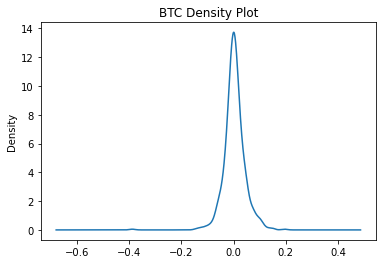

In [33]:
# If we want to incorporate a density plot. 
# We can decide how many visualizations/analysis we want to include. 

daily_returns.plot.density(title=f'{symbol} Density Plot')


In [36]:
# mc_simulation is a different package than we used in class.
#from mc_simulation import MonteCarloSimulation as mcs

In [39]:

from MCForecastTools import MCSimulation

In [49]:
# Monte Carlo Projections
    #using 'btc' as a placeholder. We want this to be dataframe of whatever coin user selects.
MC_fiveyear = MCSimulation(
    portfolio_data = btc,
    weights = 1.0,
    num_simulation = 500,
    num_trading_days = 365*5
)
    


TypeError: 'float' object is not iterable